<a href="https://colab.research.google.com/github/RegenImm-Lab/adaptive_immune_limb_regen/blob/main/20251107_GO_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install tools needed

In [5]:
!pip install goatools pandas matplotlib numpy seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.8/15.8 MB 87.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.3/175.3 kB 14.4 MB/s eta 0:00:00


Download all necessary references

In [17]:
!wget https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/040/938/575/GCF_040938575.1_UKY_AmexF1_1/GCF_040938575.1-RS_2024_10_gene_ontology.gaf.gz
!gunzip GCF_040938575.1-RS_2024_10_gene_ontology.gaf.gz
!wget http://purl.obolibrary.org/obo/go/go-basic.obo
!wget https://current.geneontology.org/annotations/goa_human.gaf.gz
!gunzip goa_human.gaf.gz
!wget https://current.geneontology.org/annotations/xenbase.gaf.gz
!gunzip xenbase.gaf.gz
!wget https://lu.box.com/shared/static/r4ikbqvlpbnj5j31469aok18j4ktdrux.annotations -O axolotl_eggnog.emapper.annotations
!wget https://lu.box.com/shared/static/mr77al2kpxfy2twrlo94c8okmud60px6.tsv -O axolotl_eggnog_union_per_gene.tsv

--2025-11-12 10:26:19--  https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/040/938/575/GCF_040938575.1_UKY_AmexF1_1/GCF_040938575.1-RS_2024_10_gene_ontology.gaf.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.11, 130.14.250.12, 130.14.250.13, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1334600 (1.3M) [application/x-gzip]
Saving to: ‘GCF_040938575.1-RS_2024_10_gene_ontology.gaf.gz’

GCF_040938575.1-RS_ 100%[===================>]   1.27M  1.20MB/s    in 1.1s    

2025-11-12 10:26:21 (1.20 MB/s) - ‘GCF_040938575.1-RS_2024_10_gene_ontology.gaf.gz’ saved [1334600/1334600]

gzip: GCF_040938575.1-RS_2024_10_gene_ontology.gaf already exists; do you wish to overwrite (y or n)? n
	not overwritten
--2025-11-12 10:26:25--  http://purl.obolibrary.org/obo/go/go-basic.obo
Resolving purl.obolibrary.org (purl.obolibrary.org)... 172.64.150.197, 104.18.37.59, 2606:4700:4409::6812:25

In [18]:
from goatools.obo_parser import GODag
from goatools.associations import read_gaf
from collections import Counter

# Load GO DAG
go_dag = GODag("/content/go-basic.obo")

# Read GAF
axolotl_NCBI = read_gaf("/content/GCF_040938575.1-RS_2024_10_gene_ontology.gaf")
human = read_gaf("/content/goa_human.gaf")
xenopus = read_gaf("/content/xenbase.gaf")
axolotl_eggnog_raw = "/content/axolotl_eggnog.emapper.annotations"
axolotl_eggnog_union = "/content/axolotl_eggnog_union_per_gene.tsv"


/content/go-basic.obo: fmt(1.2) rel(2025-10-10) 42,666 Terms
HMS:0:00:02.202843  98,568 annotations READ: /content/GCF_040938575.1-RS_2024_10_gene_ontology.gaf 
16312 IDs in loaded association branch, BP
HMS:0:00:26.520763 972,437 annotations READ: /content/goa_human.gaf 
34647 IDs in loaded association branch, BP
HMS:0:00:08.131417 334,696 annotations READ: /content/xenbase.gaf 
31364 IDs in loaded association branch, BP


Loading GO ontology...
go-basic.obo: fmt(1.2) rel(2025-10-10) 42,666 Terms
Reading Xenopus (GAF)...
Reading Axolotl (GAF)...
Reading Axolotl (EggNOG-isoform)...
Reading Axolotl (EggNOG-union TSV)...

=== Xenopus (GAF) ===
Entities annotated: 39326
Total GO annotations: 334577
Avg GO terms per entity: 8.51
IEA proportion: 76.33%
Weighted mean GO term depth: 4.79

=== Axolotl (GAF) ===
Entities annotated: 19905
Total GO annotations: 98568
Avg GO terms per entity: 4.95
IEA proportion: 100.00%
Weighted mean GO term depth: 5.13

=== Axolotl (EggNOG-isoform) ===
Entities annotated: 39548
Total GO annotations: 5641499
Avg GO terms per entity: 142.65
IEA proportion: NA (no evidence in source)
Weighted mean GO term depth: 4.30

=== Axolotl (EggNOG-union) ===
Entities annotated: 16752
Total GO annotations: 2213319
Avg GO terms per entity: 132.12
IEA proportion: NA (no evidence in source)
Weighted mean GO term depth: 4.28


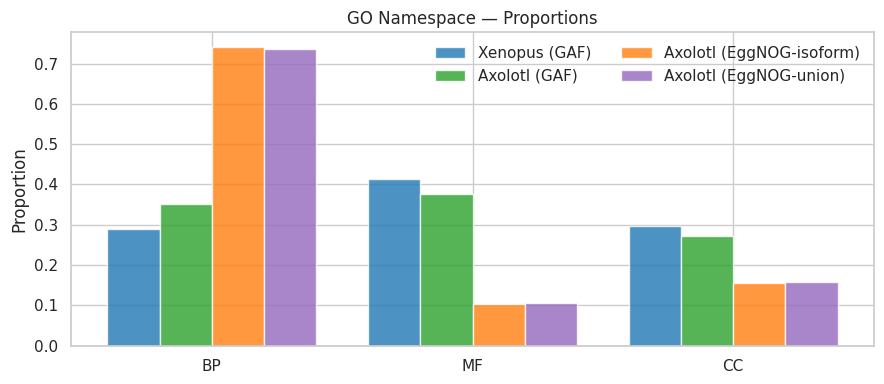

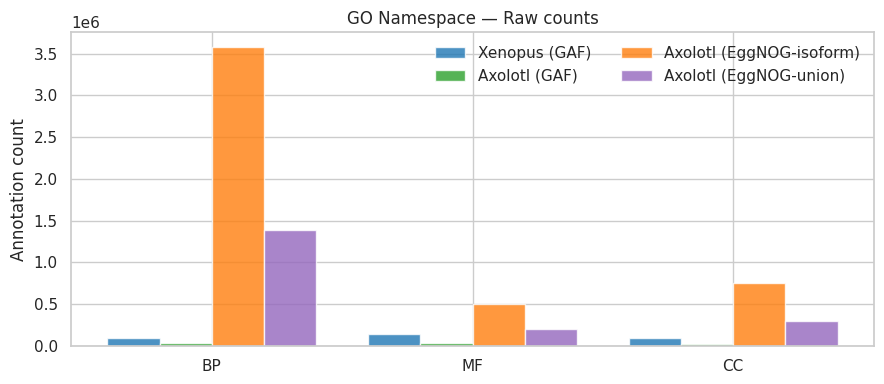

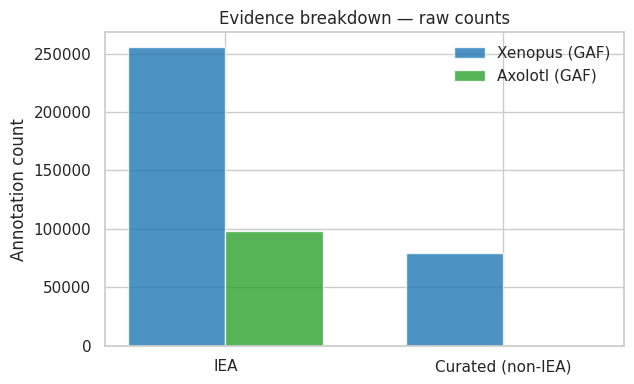

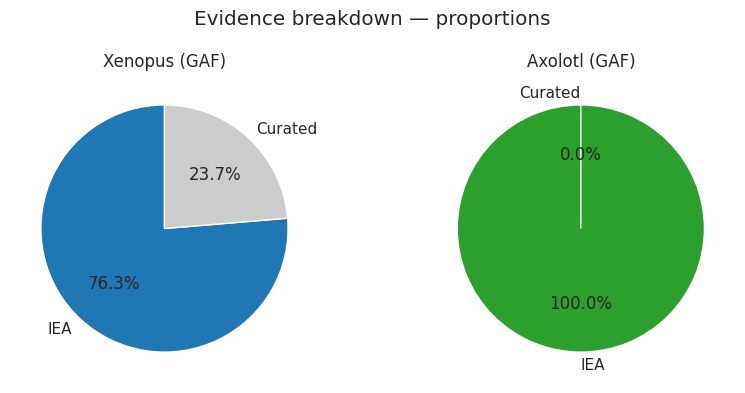

In [23]:
# --- Xenopus (GAF) vs Axolotl (GAF) vs Axolotl (EggNOG-isoform) vs Axolotl (EggNOG-union) ---

import os, gzip, io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter, defaultdict
from goatools.obo_parser import GODag

sns.set(style="whitegrid")

# --------------------
# CONFIG — set your paths here
# --------------------
axolotl_eggnog_union = "axolotl_eggnog_union_per_gene.tsv"
axolotl_gaf          = "/content/GCF_040938575.1-RS_2024_10_gene_ontology.gaf"
xenopus_gaf          = "xenbase.gaf.gz"
axolotl_eggnog_raw   = "axolotl_eggnog.emapper.annotations"
obo_file             = "go-basic.obo"
exclude_iea          = False

# --------------------
# Helpers
# --------------------
def smart_open(path):
    return io.TextIOWrapper(gzip.open(path, 'rb')) if path.endswith('.gz') else open(path, 'r', encoding='utf-8', errors='ignore')

def parse_eggnog_isoforms(file_path):
    term_counts = Counter()
    id2go = defaultdict(set)
    with open(file_path, 'r', encoding='utf-8', errors='ignore') as fh:
        for line in fh:
            if not line.strip() or line.startswith('#'):
                continue
            parts = line.rstrip('\n').split('\t')
            if len(parts) < 10:
                continue
            prot_id = parts[0]
            go_terms = parts[9]
            if go_terms and go_terms != '-':
                gos = [go.strip() for go in go_terms.split(',') if go.strip().startswith('GO:')]
                for go in set(gos):
                    term_counts[go] += 1
                    id2go[prot_id].add(go)
    return id2go, term_counts

def parse_gene_union_tsv(file_path, go_col=None, gene_col='gene_id'):
    df = pd.read_csv(file_path, sep='\t', dtype=str, na_filter=False)
    if go_col is None:
        for cand in ['GOs_union', 'GOs', 'go_terms', 'GO_terms', 'GOsUnion', 'gos']:
            if cand in df.columns:
                go_col = cand
                break
    if go_col is None:
        raise ValueError(f"Could not find a GO column in {file_path}. Columns present: {list(df.columns)}")

    term_counts = Counter()
    gene2go = defaultdict(set)
    for _, row in df.iterrows():
        gene = row[gene_col]
        gos_raw = row.get(go_col, '')
        if not gene or gos_raw in ('', '-', 'NA', 'NaN', None):
            continue
        terms = [t.strip() for t in str(gos_raw).split(',') if t.strip().startswith('GO:')]
        for go in set(terms):
            gene2go[gene].add(go)
            term_counts[go] += 1
    return gene2go, term_counts

def read_gaf_filtered(gaf_path, exclude_iea=False):
    gene2go = defaultdict(set)
    term_counts = Counter()
    ev_counts = Counter()
    genes = set()
    with smart_open(gaf_path) as fh:
        for line in fh:
            if not line or line.startswith('!'):
                continue
            parts = line.rstrip('\n').split('\t')
            if len(parts) < 7:
                continue
            qualifier = parts[3]
            go_id     = parts[4]
            evidence  = parts[6]
            gene      = parts[2] if parts[2] else parts[1]
            if qualifier and 'NOT' in qualifier.split('|'):
                continue
            if exclude_iea and evidence == 'IEA':
                continue
            gene2go[gene].add(go_id)
            term_counts[go_id] += 1
            ev_counts[evidence] += 1
            genes.add(gene)
    return gene2go, term_counts, ev_counts, genes

NS_MAP = {'biological_process':'BP','molecular_function':'MF','cellular_component':'CC'}

def namespace_counts(term_counts, go_dag):
    ns = Counter({'BP':0, 'MF':0, 'CC':0})
    for go_id, c in term_counts.items():
        t = go_dag.get(go_id)
        if t is None:
            continue
        ns_tag = NS_MAP.get(t.namespace)
        if ns_tag:
            ns[ns_tag] += c
    return ns

def mean_depth(term_counts, go_dag, weighted=True):
    depths = []
    for go_id, c in term_counts.items():
        t = go_dag.get(go_id)
        if t is None or t.depth is None:
            continue
        depths.extend([t.depth] * int(c) if weighted else [t.depth])
    return float(np.mean(depths)) if depths else np.nan

def plot_ns_four(ns_list, labels, colors):
    cats = ['BP','MF','CC']
    counts = [np.array([ns.get(k,0) for k in cats], dtype=float) for ns in ns_list]
    props  = [c / (c.sum() or 1) for c in counts]
    x = np.arange(len(cats)); width = 0.20

    plt.figure(figsize=(9,4))
    for i, (p, color) in enumerate(zip(props, colors)):
        plt.bar(x + (i-1.5)*width, p, width, label=labels[i], color=color, alpha=0.8)
    plt.xticks(x, cats); plt.ylabel('Proportion'); plt.title('GO Namespace — Proportions')
    plt.legend(frameon=False, ncol=2); plt.tight_layout(); plt.show()

    plt.figure(figsize=(9,4))
    for i, (c, color) in enumerate(zip(counts, colors)):
        plt.bar(x + (i-1.5)*width, c, width, label=labels[i], color=color, alpha=0.8)
    plt.xticks(x, cats); plt.ylabel('Annotation count'); plt.title('GO Namespace — Raw counts')
    plt.legend(frameon=False, ncol=2); plt.tight_layout(); plt.show()

def evidence_breakdown(ev_counts):
    total = sum(ev_counts.values()) or 1
    iea   = ev_counts.get('IEA', 0)
    curated = total - iea
    return {'IEA': iea, 'Curated (non-IEA)': curated, 'Total': total}

def quick_stats(label, gene2go, term_counts, ev_counts=None):
    total_ann = int(sum(term_counts.values()))
    genes_annot = len(gene2go)
    avg_terms_per_gene = (total_ann / genes_annot) if genes_annot else 0.0
    md = mean_depth(term_counts, go_dag, weighted=True)
    print(f"\n=== {label} ===")
    print(f"Entities annotated: {genes_annot}")
    print(f"Total GO annotations: {total_ann}")
    print(f"Avg GO terms per entity: {avg_terms_per_gene:.2f}")
    if ev_counts is not None and sum(ev_counts.values()) > 0:
        iea_prop = ev_counts.get('IEA',0)/sum(ev_counts.values())
        print(f"IEA proportion: {iea_prop:.2%}")
    else:
        print("IEA proportion: NA (no evidence in source)")
    print(f"Weighted mean GO term depth: {md:.2f}")

# --------------------
# Load ontology
# --------------------
print("Loading GO ontology...")
go_dag = GODag(obo_file)

# --------------------
# Read datasets
# --------------------
print("Reading Xenopus (GAF)...")
xe_g2go, xe_terms, xe_ev, xe_genes = read_gaf_filtered(xenopus_gaf, exclude_iea=exclude_iea)

print("Reading Axolotl (GAF)...")
axG_g2go, axG_terms, axG_ev, axG_genes = read_gaf_filtered(axolotl_gaf, exclude_iea=exclude_iea)

print("Reading Axolotl (EggNOG-isoform)...")
axEraw_g2go, axEraw_terms = parse_eggnog_isoforms(axolotl_eggnog_raw)

print("Reading Axolotl (EggNOG-union TSV)...")
axEunion_g2go, axEunion_terms = parse_gene_union_tsv(axolotl_eggnog_union)

# --------------------
# Quick stats
# --------------------
quick_stats("Xenopus (GAF)", xe_g2go, xe_terms, xe_ev)
quick_stats("Axolotl (GAF)", axG_g2go, axG_terms, axG_ev)
quick_stats("Axolotl (EggNOG-isoform)", axEraw_g2go, axEraw_terms)
quick_stats("Axolotl (EggNOG-union)", axEunion_g2go, axEunion_terms)

# --------------------
# Namespace plots (4-way)
# --------------------
ns_xe       = namespace_counts(xe_terms, go_dag)
ns_axG      = namespace_counts(axG_terms, go_dag)
ns_axEraw   = namespace_counts(axEraw_terms, go_dag)
ns_axEunion = namespace_counts(axEunion_terms, go_dag)

colors = ["#1f77b4", "#2ca02c", "#ff7f0e", "#9467bd"]  # blue, green, orange, purple
plot_ns_four(
    [ns_xe, ns_axG, ns_axEraw, ns_axEunion],
    ["Xenopus (GAF)", "Axolotl (GAF)", "Axolotl (EggNOG-isoform)", "Axolotl (EggNOG-union)"],
    colors
)

# --------------------
# Evidence plots (GAFs only)
# --------------------
eb_axG = evidence_breakdown(axG_ev)
eb_xe  = evidence_breakdown(xe_ev)

labels = ['IEA','Curated (non-IEA)']
x = np.arange(len(labels)); width=0.35
plt.figure(figsize=(6.5,4))
plt.bar(x - width/2, [eb_xe['IEA'], eb_xe['Curated (non-IEA)']],  width, label='Xenopus (GAF)', color=colors[0], alpha=0.8)
plt.bar(x + width/2, [eb_axG['IEA'], eb_axG['Curated (non-IEA)']], width, label='Axolotl (GAF)', color=colors[1], alpha=0.8)
plt.xticks(x, labels); plt.ylabel('Annotation count')
plt.title('Evidence breakdown — raw counts'); plt.legend(frameon=False); plt.tight_layout(); plt.show()

fig, axes = plt.subplots(1,2, figsize=(8.5,4))
axes[0].pie([eb_xe['IEA'], eb_xe['Curated (non-IEA)']],  labels=['IEA','Curated'], autopct='%1.1f%%', startangle=90, colors=[colors[0],'#cccccc'])
axes[0].set_title('Xenopus (GAF)')
axes[1].pie([eb_axG['IEA'], eb_axG['Curated (non-IEA)']], labels=['IEA','Curated'], autopct='%1.1f%%', startangle=90, colors=[colors[1],'#cccccc'])
axes[1].set_title('Axolotl (GAF)')
plt.suptitle('Evidence breakdown — proportions'); plt.tight_layout(); plt.show()
